In [23]:
# This is just a preamble that sets a bunch of options up.

# render graphs inline
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [24]:
path = '/Users/terence/Downloads/HistoricalQuotes (4).csv'

In [25]:
import csv
with open(path, 'r') as fi:
    reader = csv.reader(fi)
    for row in reader:
        print(', '.join(row))

date, close, volume, open, high, low
16:00, 316.48, 5,061,838, 316.40, 319.40, 314.511
2018/03/20, 317.5000, 5983240.0000, 313.2600, 319.5000, 312.8000
2018/03/19, 313.4800, 9844201.0000, 315.8000, 317.0000, 307.3400
2018/03/16, 318.4500, 7315268.0000, 321.4200, 324.1100, 318.3700
2018/03/15, 321.0900, 5465467.0000, 323.1700, 323.4000, 318.1400
2018/03/14, 321.5500, 10463840.0000, 318.1600, 323.8800, 317.7000
2018/03/13, 315.8800, 12878750.0000, 323.8700, 325.8409, 313.2780
2018/03/12, 321.3000, 20277420.0000, 333.5600, 333.9800, 318.6000
2018/03/09, 331.4400, 14320240.0000, 321.3300, 331.4400, 320.2300
2018/03/08, 317.0000, 11366700.0000, 322.2000, 322.9176, 314.1300
2018/03/07, 321.1600, 17110740.0000, 320.0000, 323.7400, 314.5500
2018/03/06, 325.2200, 18245450.0000, 319.8800, 325.7900, 316.5000
2018/03/05, 315.0000, 18957770.0000, 302.8500, 316.9100, 297.6000
2018/03/02, 301.0500, 13278500.0000, 284.6500, 301.1800, 283.2300
2018/03/01, 290.3900, 11892990.0000, 292.7500, 295.2500, 28

### Look how _pretty_ this is!

In [26]:
dataset = pd.read_csv(path)
dataset.head()

,date,close,volume,open,high,low
0,16:00,316.480,"5,061,838",316.400,319.400,314.511
1,2018/03/20,317.500,5983240.0000,313.260,319.500,312.800
2,2018/03/19,313.480,9844201.0000,315.800,317.000,307.340
3,2018/03/16,318.450,7315268.0000,321.420,324.110,318.370
4,2018/03/15,321.090,5465467.0000,323.170,323.400,318.140


In [27]:
# We can manipulate the data!
(dataset['high'] - dataset['low']).head()

0   4.889
1   6.700
2   9.660
3   5.740
4   5.260
dtype: float64

In [28]:
# Sort by date
dataset = dataset[1:]
dataset.date = pd.to_datetime(dataset.date, format='%Y/%m/%d')
dataset.set_index('date', inplace=True)
dataset.sort_index(inplace=True)
dataset.head()

,close,volume,open,high,low
date,,,,,
2015-03-20,61.185,13623971.0000,61.337,61.786,60.896
2015-03-23,60.714,7658688.0000,60.890,61.156,60.330
2015-03-24,62.611,16869746.0000,61.136,63.099,61.119
2015-03-25,60.250,21626471.0000,62.684,62.691,60.244
2015-03-26,59.751,16005477.0000,59.629,60.447,59.390


In [29]:
# Feature Scale Volume!
dataset['volume'] = dataset['volume'].astype(float) * 1e-6

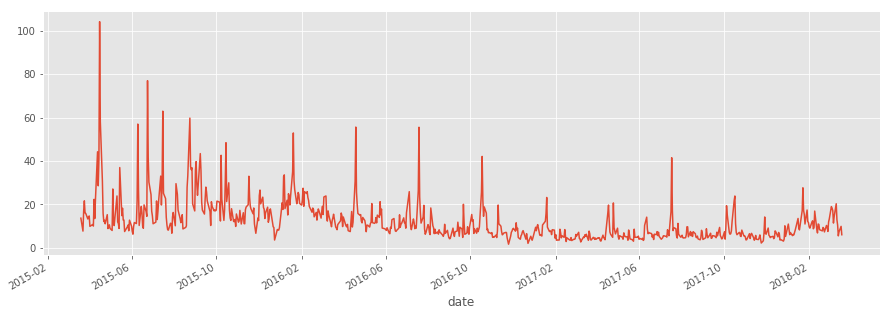

In [30]:
# What does the volume look like?
dataset['volume'].plot()

## Plot prices!

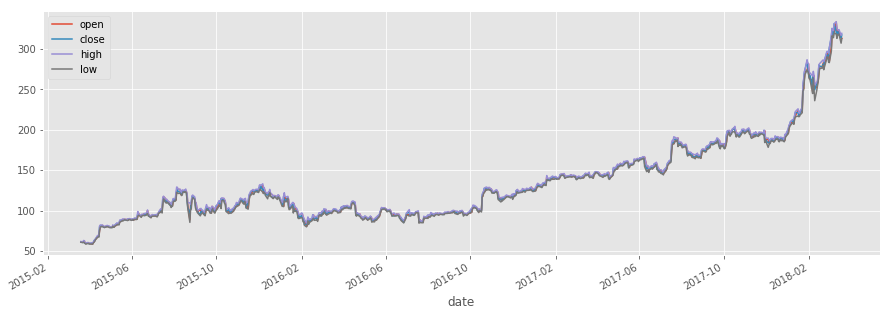

In [31]:
dataset[['open', 'close', 'high', 'low']].plot()

# Let's predict closing prices with Machine Learning!

In [35]:
# split columns into two sets. 
# Explanatory variables, X. Dependent Variable, Y

X = dataset[['volume', 'open', 'high', 'low']]
Y = dataset['close']

display(X.head())
display(Y.head())

,volume,open,high,low
date,,,,
2015-03-20,13.624,61.337,61.786,60.896
2015-03-23,7.659,60.890,61.156,60.330
2015-03-24,16.870,61.136,63.099,61.119
2015-03-25,21.626,62.684,62.691,60.244
2015-03-26,16.005,59.629,60.447,59.390


date
2015-03-20   61.185
2015-03-23   60.714
2015-03-24   62.611
2015-03-25   60.250
2015-03-26   59.751
Name: close, dtype: float64

In [33]:
# Split the data into training and test sets

train_len = int(len(dataset) * .9)

X_train = X[:train_len]
Y_train = Y[:train_len]
X_test = X[train_len:]
Y_test = Y[train_len:]

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 680
Test size: 76


In [34]:
# Import the algorithm!

from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [85]:
# 1. Create the model

model = LinearRegression()

# 2. Fit the model

model.fit(X_train, Y_train)

# 3. Test it!

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))


0.99965759623
0.983755197236


## How does the machine predict?

In [86]:
# Print the model equation

eq = "close = "
for i in range(len(X_train.columns)):
    eq += "%.6f * %s + " % (model.coef_[i], X_train.columns[i])
eq += "%.6f" % model.intercept_

print("Linear regression model:")
print(eq)

Linear regression model:
close = 0.000449 * volume + -0.548604 * open + 0.747805 * high + 0.802857 * low + -0.035815


# Let's try a different data set! How about past prices?

In [87]:
days_to_look_back = 5
prev_close = dataset['close']

for i in range(1, days_to_look_back + 1):

    prev_close = dataset['close'].shift(i)
    
    dataset['prev_close_%d' % i] = prev_close

dataset.head()

,close,volume,open,high,low,prev_close_1,prev_close_2,prev_close_3,prev_close_4,prev_close_5
date,,,,,,,,,,
2011/04/21,36.031,36.908,34.877,36.046,34.799,nan,nan,nan,nan,nan
2011/04/25,35.953,69.284,36.387,36.426,35.429,36.031,nan,nan,nan,nan
2011/04/26,32.701,110.541,33.873,34.604,32.471,35.953,36.031,nan,nan,nan
2011/04/27,33.709,56.249,32.667,33.801,32.164,32.701,35.953,36.031,nan,nan
2011/04/28,33.481,30.818,33.286,34.206,33.234,33.709,32.701,35.953,36.031,nan


In [88]:
# Drop NaN's

dataset.dropna(inplace=True)
dataset.head()

,close,volume,open,high,low,prev_close_1,prev_close_2,prev_close_3,prev_close_4,prev_close_5
date,,,,,,,,,,
2011/04/29,33.239,20.896,33.257,33.639,33.100,33.481,33.709,32.701,35.953,36.031
2011/05/02,33.885,35.524,34.031,34.267,33.486,33.239,33.481,33.709,32.701,35.953
2011/05/03,33.034,32.453,33.670,33.706,32.571,33.885,33.239,33.481,33.709,32.701
2011/05/04,32.741,33.518,33.114,33.143,32.186,33.034,33.885,33.239,33.481,33.709
2011/05/05,32.901,27.490,32.341,33.397,32.317,32.741,33.034,33.885,33.239,33.481


In [89]:
# Split the data into training and test sets

X2 = dataset[['prev_close_%d' % i for i in range(1, days_to_look_back + 1)]]

Y2 = dataset['close']

X2_train = X2[:train_len]
Y2_train = Y2[:train_len]
X2_test = X2[train_len:]
Y2_test = Y2[train_len:]

print('Train size:', len(X2_train))
print('Test size:', len(X2_test))

from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

('Train size:', 1132)
('Test size:', 121)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

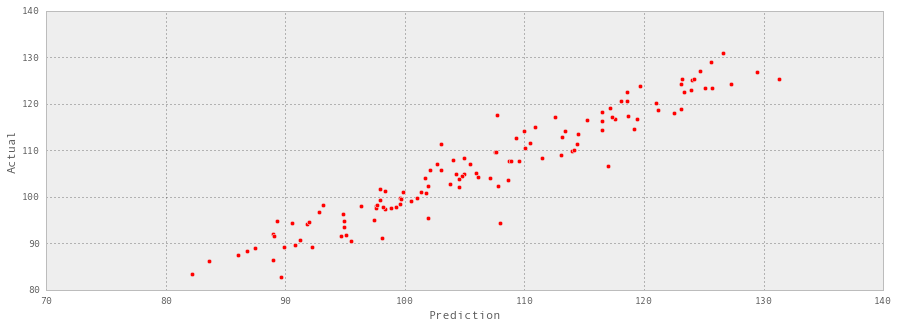

In [90]:
# Scatter the actual prices vs. predicted prices

Y2_pred = model2.predict(X2_test)
plt.scatter(x = Y2_pred, y = Y2_test, c = 'r')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [91]:
print(model2.score(X2_train, Y2_train))
print(model2.score(X2_test, Y2_test))

0.99683650203
0.91628414654


# Which days are great for stocks?

In [92]:
# What are returns?
dataset['return'] = (dataset['close'] - dataset['open'])/dataset['open']

In [93]:
# Define previous day open-to-close returns

days_to_look_back = 5
prev_return = dataset['return']

for i in range(1, days_to_look_back + 1):
    prev_return = dataset['return'].shift(i)
    dataset['prev_return_%d' % i] = prev_return
dataset.dropna(inplace=True)
print(dataset.head())

            close  volume   open   high    low  prev_close_1  prev_close_2  \
date                                                                         
2011/05/06 32.781  22.049 33.253 33.306 32.714        32.901        32.741   
2011/05/09 33.773  28.835 33.115 33.829 33.051        32.781        32.901   
2011/05/10 33.947  26.274 33.880 34.214 33.573        33.773        32.781   
2011/05/11 34.381  33.072 34.150 34.643 34.001        33.947        33.773   
2011/05/12 35.110  36.353 34.457 35.250 34.199        34.381        33.947   

            prev_close_3  prev_close_4  prev_close_5  return  prev_return_1  \
date                                                                          
2011/05/06        33.034        33.885        33.239  -0.014          0.017   
2011/05/09        32.741        33.034        33.885   0.020         -0.014   
2011/05/10        32.901        32.741        33.034   0.002          0.020   
2011/05/11        32.781        32.901        32.741   0.0

In [94]:
# Train a model for today's return based on previous day returns

X = dataset[['prev_return_%d' % i for i in range(1, days_to_look_back + 1)]]
Y = dataset['return']

X_train = X[:train_len]
Y_train = Y[:train_len]
X_test = X[train_len:]
Y_test = Y[train_len:]

print('Train size:', len(X_train))
print('Test size:', len(X_test))

model = LinearRegression()
model.fit(X_train, Y_train)

('Train size:', 1132)
('Test size:', 116)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.0086154761138
-0.0277203584263


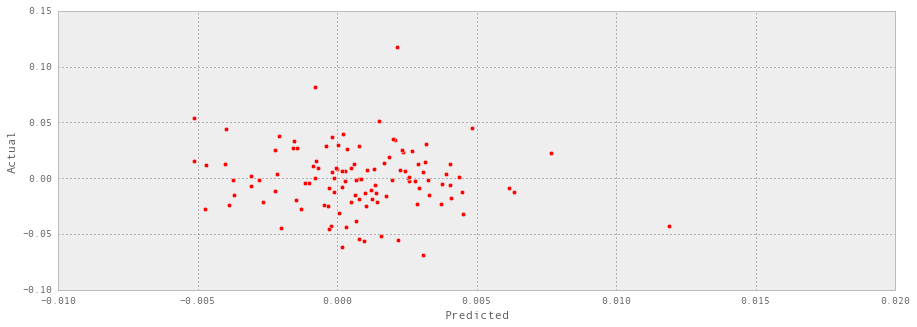

In [96]:
# Scatter the actual returns vs. predicted returns
Y_pred = model.predict(X_test)
Y_pred = pd.Series(Y_pred, index = Y_test.index)
plt.scatter(x=Y_pred, y=Y_test, c='r')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

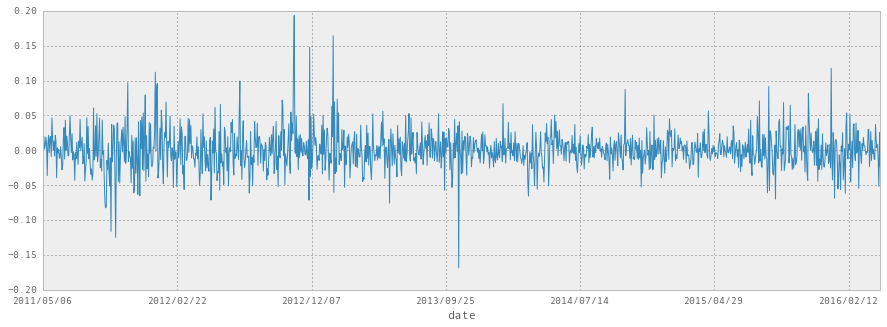

In [97]:
dataset['return'].plot()

## What have we learned?